## <b>Moving averages (MA) 

MA at a time index t estimates the average trend cycle component Ft and is calculated by taking average of over the time period of t ± k where k is the range of the MA. Taking moving averages have an effect of smoothing the original time series by eliminating random noise. Commonly the total number of observations m = 2k + 1 is used to describe the moving average as m-order MA. 

Computation of moving averages and their application in smoothing time series

In [1]:
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Load the dataset into a pandas.DataFrame
ibm_df = pd.read_csv(
    '../Data Files/ibm-common-stock-closing-prices.csv', parse_dates=['Date'], index_col=['Date']
)

In [3]:
# Let's find out the shape of the DataFrame
print('Shape of the dataframe:', ibm_df.shape)

Shape of the dataframe: (1009, 1)


In [4]:
# Let's see the top 10 rows
ibm_df.head(5)

,IBM common stock closing prices
Date,
1962-01-02,572.00
1962-01-03,577.00
1962-01-04,571.25
1962-01-05,560.00
1962-01-08,549.50


In [5]:
# Rename the second column
ibm_df.rename(columns={
    'IBM common stock closing prices': 'Close_Price'}, inplace=True
)
ibm_df.head()

,Close_Price
Date,
1962-01-02,572.00
1962-01-03,577.00
1962-01-04,571.25
1962-01-05,560.00
1962-01-08,549.50


In [6]:
# remove missing values 
missing = (pd.isnull(ibm_df.index)) & (pd.isnull(ibm_df['Close_Price']))
print('No. of rows with missing values:', missing.sum())
ibm_df = ibm_df.loc[~missing, :]

No. of rows with missing values: 0


In [7]:
# To illustrate the idea of moving average we compute a weekly moving average taking
# a window of 5 days instead of 7 days because trading happens only during the weekdays.
ibm_df['5-Day Moving Avg'] = ibm_df['Close_Price'].rolling(window=5).mean()

In [8]:
ibm_df.head(5)

,Close_Price,5-Day Moving Avg
Date,,
1962-01-02,572.00,NaN
1962-01-03,577.00,NaN
1962-01-04,571.25,NaN
1962-01-05,560.00,NaN
1962-01-08,549.50,565.95


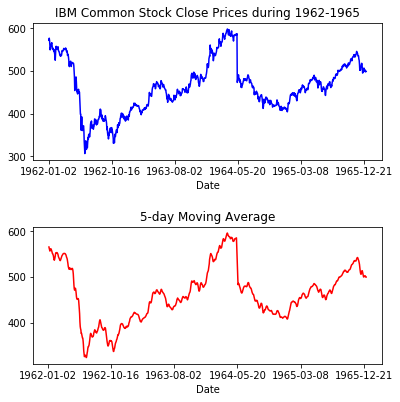

In [9]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax, color='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

## </b> Higher order MA
The MA with an odd order m = 2 x 2 + 1 = 5 and is symmetric with equal number of observations on both sides of the time index t at which the MA is being calculated. However, it is possible to have an asymmetric MA of even order m = 2k. The asymmetry of an even order moving average can be eliminated by taking a second moving average of an even order.

In [10]:
# Calculate the moving averages using 'rolling' and 'mean' functions
MA2 = ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

In [11]:
# Let's remove NaN from the above variables
MA2 = MA2.loc[~pd.isnull(MA2)]
TwoXMA2 = TwoXMA2.loc[~pd.isnull(TwoXMA2)]

MA4 = MA4.loc[~pd.isnull(MA4)]
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

MA3 = MA3.loc[~pd.isnull(MA3)]
ThreeXMA3 = TwoXMA4.loc[~pd.isnull(ThreeXMA3)]

In [12]:

print(MA2.head(3))
print("\n")
print(TwoXMA2.head(3))
print("\n\n")

print(MA4.head(3))
print("\n")
print(TwoXMA4.head(3))
print("\n\n")

print(MA3.head(3))
print("\n")
print(ThreeXMA3.head(3))

Date
1962-01-03    574.500
1962-01-04    574.125
1962-01-05    565.625
Name: Close_Price, dtype: float64


Date
1962-01-04    574.3125
1962-01-05    569.8750
1962-01-08    560.1875
Name: Close_Price, dtype: float64



Date
1962-01-05    570.0625
1962-01-08    564.4375
1962-01-09    559.1875
Name: Close_Price, dtype: float64


Date
1962-01-08    567.25000
1962-01-09    561.81250
1962-01-10    557.40625
Name: Close_Price, dtype: float64



Date
1962-01-04    573.416667
1962-01-05    569.416667
1962-01-08    560.250000
Name: Close_Price, dtype: float64


Date
1962-01-08    567.25000
1962-01-09    561.81250
1962-01-10    557.40625
Name: Close_Price, dtype: float64


Text(0.5,1,'3 day MA & 3X 3day MA')

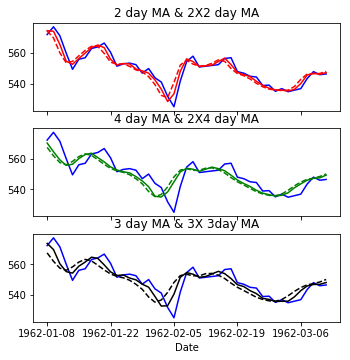

In [13]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'][:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2[:45].plot(color='r', linestyle = '-', ax=axarr[0])
TwoXMA2[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA')

ibm_df['Close_Price'][:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4[:45].plot(color='g', linestyle = '-', ax=axarr[1])
TwoXMA4[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

ibm_df['Close_Price'][:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3[:45].plot(color='k', linestyle = '-', ax=axarr[2])
ThreeXMA3[:45].plot(color='k', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA')